# Prerequisites
Before you can execute this notebook you'll need the graph logs which you can generate by running the `nervenet_graph_generation.py` in the `NerveNet` subfolder

In [7]:
import pandas as pd
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [8]:

basepath = Path(os.getcwd())
# make sure your working directory is the repository root.
if basepath.name != "tum-adlr-ws21-04":
    os.chdir(basepath.parent.parent)
    
basepath = Path(os.getcwd())

In [9]:
graph_logs_dir = basepath / "graph_logs"
graph_logs_dir.exists(), graph_logs_dir

(True,
 WindowsPath('C:/Users/HannesStark/projects/tum-adlr-ws21-04/graph_logs'))

In [10]:
log_files = [x.name for x in graph_logs_dir.glob('*.json') if x.is_file()]
log_files

['AntS-v1.json',
 'CentipedeEight-v1.json',
 'CentipedeFifty-v1.json',
 'CentipedeFive-v1.json',
 'CentipedeForty-v1.json',
 'CentipedeFour-v1.json',
 'CentipedeFourteen-v1.json',
 'CentipedeSeven-v1.json',
 'CentipedeSix-v1.json',
 'CentipedeTen-v1.json',
 'CentipedeThirty-v1.json',
 'CentipedeThree-v1.json',
 'CentipedeTwelve-v1.json',
 'CentipedeTwenty-v1.json',
 'CpCentipedeEight-v1.json',
 'CpCentipedeFour-v1.json',
 'CpCentipedeFourteen-v1.json',
 'CpCentipedeSix-v1.json',
 'CpCentipedeTen-v1.json',
 'CpCentipedeTwelve-v1.json',
 'HalfCheetah-v1.json',
 'Hopper-v1.json',
 'Humanoid-v1.json',
 'HumanoidStandup-v1.json',
 'ReacherFive-v1.json',
 'ReacherFour-v1.json',
 'ReacherOne-v1.json',
 'ReacherSeven-v1.json',
 'ReacherSix-v1.json',
 'ReacherThree-v1.json',
 'ReacherTwo-v1.json',
 'ReacherZero-v1.json',
 'SnakeEight-v1.json',
 'SnakeFive-v1.json',
 'SnakeForty-v1.json',
 'SnakeFour-v1.json',
 'SnakeNine-v1.json',
 'SnakeSeven-v1.json',
 'SnakeSix-v1.json',
 'SnakeTen-v1.json',

In [11]:
#some settings
edge_colors = {
    10:"blue", # root-body
    3:"green", # body-body
    6:"blue", # joint-body
}

def visualize_task_graph(task_name:str, figsize=(10, 10)):
    with open(str(graph_logs_dir / f"{task_name}.json")) as json_file:
        task_log = json.load(json_file)
        
    
    node_colors = {
        "red": task_log["node_type_dict"]["root"],
        "blue": task_log["node_type_dict"]["joint"],
        "black": task_log["node_type_dict"]["body"],
    }

    node_names = {node["id"]: node["raw_name"] for node in task_log["tree"] if "raw_name" in node.keys()}
    node_names[0] = "root"
    
    # Generate graph structure
    G = nx.Graph()

    for i in range(task_log["num_nodes"]):
        G.add_node(i)
        for j in range(i, task_log["num_nodes"]):
            if task_log["relation_matrix"][i][j] != 0:
                G.add_edge(i, j)
                
    # plot the graph
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G)#, pos={0: np.array([ 0, 0])})

    options = {"node_size": 100, "alpha": 0.8}
    for color, nodes in node_colors.items():
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, **options)
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, **options)


    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    for p in pos:  # raise text positions
        pos[p][1] += 0.055
    nx.draw_networkx_labels(G, pos, node_names, font_size=12)

    plt.axis("off")
    plt.show()
    
    return task_log

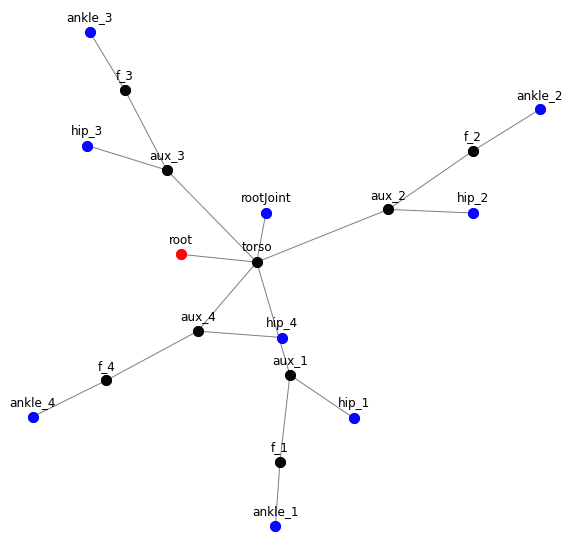

In [12]:
ant_log = visualize_task_graph("AntS-v1")

In [13]:
ant_bullet_log = visualize_task_graph("AntBulletEnv-v0")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HannesStark\\projects\\tum-adlr-ws21-04\\graph_logs\\AntBulletEnv-v0.json'

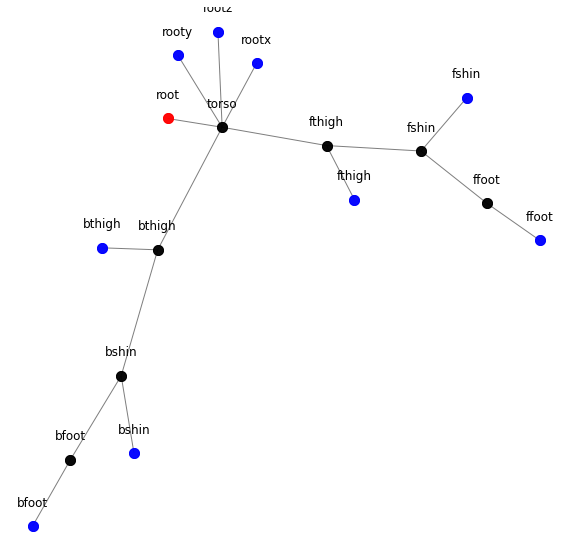

In [14]:
HalfCheetah_log = visualize_task_graph("HalfCheetah-v1")

In [ ]:
CentipedeFour_log = visualize_task_graph("CentipedeFour-v1", figsize=(14,14))

In [ ]:
Humanoid_log = visualize_task_graph("Humanoid-v1", figsize=(14,14))

In [ ]:
WalkersKangaroo_log = visualize_task_graph("WalkersKangaroo-v1")

In [ ]:
WalkersOstrich_log = visualize_task_graph("WalkersOstrich-v1")

In [ ]:
CentipedeFour_log12

In [ ]:
ant_log["node_type_dict"]

In [ ]:
ant_log["input_dict"]

In [ ]:
ant_log["num_nodes"]

In [ ]:
ant_log["relation_matrix"]

In [17]:
ant_log.keys()

dict_keys(['tree', 'relation_matrix', 'node_type_dict', 'output_type_dict', 'output_list', 'input_dict', 'debug_info', 'node_parameters', 'para_size_dict', 'num_nodes'])

In [16]:
ant_log["output_type_dict"]

{'ankle': [18, 6, 10, 14], 'hip': [16, 4, 8, 12]}

In [15]:
ant_log["output_list"]

[16, 18, 4, 6, 8, 10, 12, 14]

In [ ]:
ant_log["para_size_dict"]

In [ ]:
ant_log["debug_info"]

In [ ]:
[node for node in ant_log["tree"] if node["id"] in ant_log["output_list"]]